In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


In [21]:
# в этой таблице собрана инфа по годам рождения и смерти

data = pd.read_csv(r'D:\Python\2020\wiki_people\wiki_people.csv', sep = ';')
data

,href,year_birth,year_death
0,https://en.wikipedia.org/wiki/Abraham_Lincoln,1809.0,1865.0
1,https://en.wikipedia.org/wiki/Aristotle,-383.0,-321.0
2,https://en.wikipedia.org/wiki/Ayn_Rand,1905.0,1982.0
3,https://en.wikipedia.org/wiki/Alain_Connes,1947.0,NaN
4,https://en.wikipedia.org/wiki/Allan_Dwan,1885.0,1981.0
...,...,...,...
1198791,https://en.wikipedia.org/wiki/Markus_Västilä,1992.0,NaN
1198792,https://en.wikipedia.org/wiki/Bill_Price_(poli...,1935.0,NaN
1198793,https://en.wikipedia.org/wiki/Brindaban_Goswami,1957.0,NaN
1198794,https://en.wikipedia.org/wiki/Jules_Browde,1919.0,2016.0


In [23]:
print(min(data.year_birth))
print(max(data.year_birth))

# похоже,в массиве есть ошибочные записи, 
# а также отрицательные года, которые, в большинстве своём, видимо, означают год до нашей эры


-2678.0
19988.0


In [24]:
# удалим все отрицательные года и года, выходящие за рамки 2020
# это относится как к годам рождения, так и к годам смерти
# эта фильтрация избавит нас также и от записей с отсутствующей информацией о годе рождения или годе смрети

data = data[data.year_birth > 0][data.year_birth <= 2020][data.year_death <= 2020]
print(min(data.year_birth))
print(max(data.year_birth))
print(min(data.year_death))
print(max(data.year_death))
data



C:\Users\ordov\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


1.0
2013.0
19.0
2016.0


,href,year_birth,year_death
0,https://en.wikipedia.org/wiki/Abraham_Lincoln,1809.0,1865.0
2,https://en.wikipedia.org/wiki/Ayn_Rand,1905.0,1982.0
4,https://en.wikipedia.org/wiki/Allan_Dwan,1885.0,1981.0
6,https://en.wikipedia.org/wiki/Aldous_Huxley,1894.0,1963.0
7,https://en.wikipedia.org/wiki/Andrei_Tarkovsky,1932.0,1986.0
...,...,...,...
1198778,https://en.wikipedia.org/wiki/Irie_Sukemasa,1905.0,1985.0
1198780,https://en.wikipedia.org/wiki/Yamamoto_Satoru,1925.0,2006.0
1198784,https://en.wikipedia.org/wiki/Don_Hartman,1900.0,1958.0
1198788,https://en.wikipedia.org/wiki/Juana_María_Cond...,1862.0,1916.0


In [25]:
# преобразуем года в целые числа

data.year_birth = data.year_birth.astype(int)
data.year_death = data.year_death.astype(int)

In [64]:
# на базе полученной таблицы с 499265 записями создадим информацию о длительности жизни

start_stop_years = data.loc[:,'year_birth':'year_death']

# обнаружились ошибочные записи, в которых год смерти меньше года рождения, поэтому осталось 499254 записи

start_stop_years = start_stop_years[start_stop_years.year_death >= start_stop_years.year_birth]

life_time = pd.Series([stop-start for start,stop in start_stop_years.values])
life_time.name = 'time of life'
life_time.index = start_stop_years.index

print(start_stop_years)
print(life_time)


         year_birth  year_death
0              1809        1865
2              1905        1982
4              1885        1981
6              1894        1963
7              1932        1986
...             ...         ...
1198778        1905        1985
1198780        1925        2006
1198784        1900        1958
1198788        1862        1916
1198794        1919        2016

[499254 rows x 2 columns]
0          56
2          77
4          96
6          69
7          54
           ..
1198778    80
1198780    81
1198784    58
1198788    54
1198794    97
Name: time of life, Length: 499254, dtype: int64


In [65]:
# соберём в одну таблицу

newdata = pd.concat([start_stop_years, life_time], axis = 1)
newdata

,year_birth,year_death,time of life
0,1809,1865,56
2,1905,1982,77
4,1885,1981,96
6,1894,1963,69
7,1932,1986,54
...,...,...,...
1198778,1905,1985,80
1198780,1925,2006,81
1198784,1900,1958,58
1198788,1862,1916,54


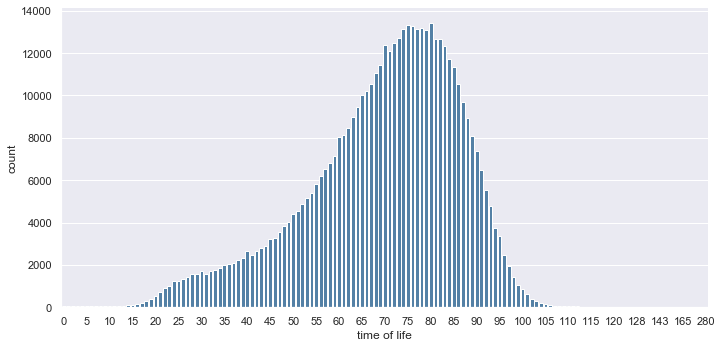

In [84]:
# так распределена популярность умирания в различных возрастах, судя по таблице
graph = sns.factorplot('time of life', data=newdata, aspect=2, kind="count", color='steelblue')
graph.set_xticklabels(step=5)


plt.show()

In [132]:
# сформируем счётчики, какой процент людей умирает в года, кратные 12 и 6

from collections import Counter


counter_12_6 = {}
counter_least = {}
for age, quantity in Counter(life_time).items():
    if age % 6 == 0 or age % 12 == 0:
        counter_12_6[age]  =  '{} %'.format(round(100 * quantity/len(life_time),2))
    else:
        counter_least[age]  =  '{} %'.format(round(100 * quantity/len(life_time),2))
        
deaths_6_12 = pd.Series(counter_12_6).rename_axis('AGE').sort_index()
deaths_least = pd.Series(counter_least).rename_axis('AGE').sort_index()
print(deaths_6_12, deaths_least, sep = '\n\n\n')


AGE
0      0.01 %
6      0.01 %
12     0.01 %
18     0.06 %
24     0.25 %
30     0.34 %
36     0.41 %
42     0.54 %
48     0.77 %
54     1.08 %
60     1.61 %
66     2.05 %
72      2.5 %
78     2.64 %
84     2.35 %
90     1.48 %
96      0.5 %
102    0.08 %
108    0.01 %
114    0.01 %
120     0.0 %
126     0.0 %
132     0.0 %
150     0.0 %
168     0.0 %
192     0.0 %
dtype: object


AGE
1      0.01 %
2      0.01 %
3      0.01 %
4      0.01 %
5      0.01 %
        ...  
160     0.0 %
165     0.0 %
169     0.0 %
181     0.0 %
280     0.0 %
Length: 115, dtype: object


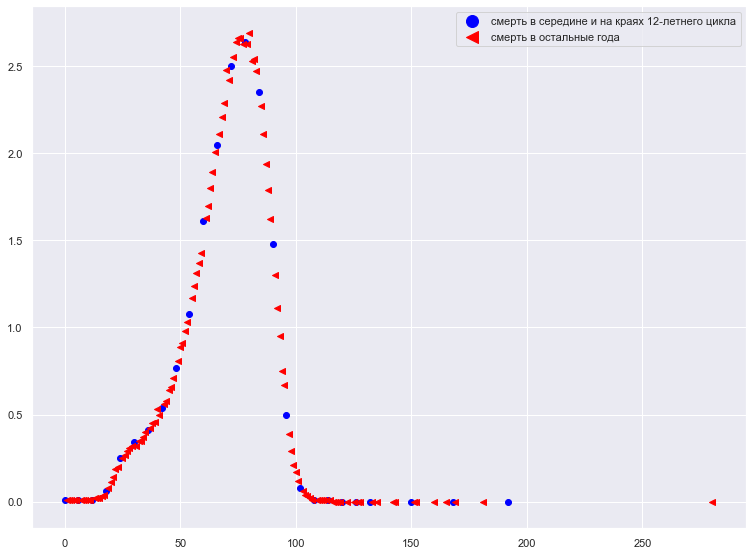

In [157]:
plt.scatter(deaths_6_12.index, [float(percent[:-2]) for percent in deaths_6_12.values],
            color = 'blue', marker = 'o', label = 'смерть в середине и на краях 12-летнего цикла')
plt.scatter(deaths_least.index, [float(percent[:-2]) for percent in deaths_least.values],
            color = 'red', marker = '<', label = 'смерть в остальные года')
plt.rcParams["figure.figsize"] = [12.8, 9.6]
plt.legend(markerscale = 2)
plt.show()

# таким образом, видно, что никакой особой корреляции процента смертей и возраста, кратного 6, 12, либо не кратного, - нет